In [2]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [21]:
mnist = tf.keras.datasets.mnist
(x_train_o, y_train), (x_test_o, y_test) = mnist.load_data()

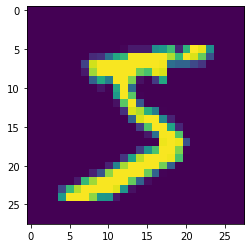

In [22]:
import matplotlib.pyplot as plt
plt.imshow(x_train_o[0])

In [23]:
import numpy as np
x_train=np.reshape(x_train_o,(60000,28,28,1))
x_test=np.reshape(x_test_o,(10000,28,28,1))

In [24]:
x_test.shape

(10000, 28, 28, 1)

In [25]:
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [8]:

model= tf.keras.models.Sequential()
l1= tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))
l2= tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu')
l3= tf.keras.layers.Flatten()
l4= tf.keras.layers.Dense(10, activation='softmax')

model.add(l1)
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(l2)
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(4, 4)))
model.add(l3)
#model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(l4)

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=512)

Epoch 1/2
118/118 [==============================] - 83s 706ms/step - loss: 0.8967 - accuracy: 0.8951 - val_loss: 0.0973 - val_accuracy: 0.9697
Epoch 2/2
118/118 [==============================] - 85s 716ms/step - loss: 0.0679 - accuracy: 0.9797 - val_loss: 0.0764 - val_accuracy: 0.9751


In [31]:
#model.evaluate(x_test, y_test)
scores = model.evaluate(x_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 2.49%


In [15]:
pred = model.predict(x_test)

In [16]:
result = []

for i in range(pred.shape[0]):
  max1=0.0
  pos=0
  for j in range(pred.shape[1]):
    if pred[i][j] > max1:
      max1 = pred[i][j]
      pos = j
  result.append(pos)


4


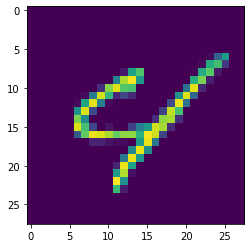

In [29]:
print(result[420])
plt.imshow(x_test_o[420])


In [ ]:
-33333398